In [2]:
# Visualizacion del dataset
import pandas as pd

df = pd.read_csv('../Data/Wildfire_Weather_Merged_new.csv')
#df.to_csv('../Data/Nasa_MeteoriteLanding.csv')
df

/tmp/ipykernel_20405/978066050.py:4: DtypeWarning: Columns (21,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/Wildfire_Weather_Merged_new.csv')


,Date,County,tmax,tmin,tavg,prcp,Year,Serial,FireCategory,Area,...,Ign_DateTime,ReportDateTime,Discover_DateTime,Control_DateTime,CreationDate,ModifiedDate,DistrictCode,UnitCode,DistFireNumber,FireEvent
0,2000-01-01,Baker,-1.68,-8.74,-5.21,0.33,2000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2000-01-01,Benton,5.54,0.59,3.06,8.33,2000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2000-01-01,Clackamas,4.24,0.33,2.28,5.88,2000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2000-01-01,Clatsop,6.86,2.49,4.68,18.26,2000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2000-01-01,Columbia,5.12,1.81,3.47,11.51,2000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309507,2022-12-31,Wallowa,2.45,-3.45,-0.50,7.34,2022,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
309508,2022-12-31,Wasco,6.39,0.11,3.25,5.85,2022,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
309509,2022-12-31,Washington,9.06,4.44,6.75,5.70,2022,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
309510,2022-12-31,Wheeler,5.71,-0.41,2.65,8.34,2022,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
#Revision de la informacion 
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309512 entries, 0 to 309511
Data columns (total 44 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date                    309512 non-null  object 
 1   County                  309512 non-null  object 
 2   tmax                    309512 non-null  float64
 3   tmin                    309512 non-null  float64
 4   tavg                    309512 non-null  float64
 5   prcp                    309512 non-null  float64
 6   Year                    309512 non-null  int64  
 7   Serial                  23472 non-null   float64
 8   FireCategory            23472 non-null   object 
 9   Area                    23472 non-null   object 
 10  DistrictName            23472 non-null   object 
 11  UnitName                23472 non-null   object 
 12  FullFireNumber          23472 non-null   object 
 13  FireName                23472 non-null   object 
 14  Size_class          

,tmax,tmin,tavg,prcp,Year,Serial,EstTotalAcres,Protected_Acres,Lat_DD,Long_DD,Sec,DistrictCode,UnitCode,FireEvent
count,309512.000000,309512.000000,309512.000000,309512.000000,309512.000000,23472.000000,23396.000000,23472.000000,23466.000000,23466.000000,23462.000000,23472.000000,23472.000000,309512.000000
mean,15.783918,3.819559,9.801738,2.885612,2010.988676,90418.201304,252.722636,58.129721,43.717938,-122.260443,18.578638,77.750852,779.332353,0.075836
std,9.205315,6.163994,7.456448,6.666913,6.635189,20898.527341,6668.023401,1845.078523,1.225580,1.705490,10.439685,14.617777,146.522975,0.264735
min,-14.260000,-26.670000,-19.470000,0.000000,2000.000000,57485.000000,0.000000,0.000000,41.996940,-124.983610,1.000000,51.000000,511.000000,0.000000
25%,8.520000,-0.320000,4.300000,0.000000,2005.000000,72507.750000,0.010000,0.010000,42.526128,-123.387667,10.000000,71.000000,711.000000,0.000000
50%,14.710000,3.830000,9.250000,0.030000,2011.000000,88319.500000,0.100000,0.100000,43.581390,-122.848160,19.000000,73.000000,732.000000,0.000000
75%,23.250000,8.500000,15.720000,2.650000,2017.000000,107417.250000,0.500000,0.350000,44.789017,-121.543060,28.000000,95.000000,954.000000,0.000000
max,44.600000,22.930000,33.320000,163.170000,2022.000000,134021.000000,499945.000000,154570.000000,46.235000,-116.521110,36.000000,99.000000,991.000000,1.000000


In [4]:
#Revision de datos nulos.
df.isna().sum()

Date                           0
County                         0
tmax                           0
tmin                           0
tavg                           0
prcp                           0
Year                           0
Serial                    286040
FireCategory              286040
Area                      286040
DistrictName              286040
UnitName                  286040
FullFireNumber            286040
FireName                  286040
Size_class                286040
EstTotalAcres             286116
Protected_Acres           286040
HumanOrLightning          286040
CauseBy                   286165
GeneralCause              286040
SpecificCause             286261
Cause_Comments            299713
Lat_DD                    286046
Long_DD                   286046
LatLongDD                 286046
FO_LandOwnType            286040
Twn                       286050
Rng                       286053
Sec                       286050
Subdiv                    286069
LandmarkLo

In [6]:
df.columns

Index(['Date', 'County', 'tmax', 'tmin', 'tavg', 'prcp', 'Year', 'Serial',
       'FireCategory', 'Area', 'DistrictName', 'UnitName', 'FullFireNumber',
       'FireName', 'Size_class', 'EstTotalAcres', 'Protected_Acres',
       'HumanOrLightning', 'CauseBy', 'GeneralCause', 'SpecificCause',
       'Cause_Comments', 'Lat_DD', 'Long_DD', 'LatLongDD', 'FO_LandOwnType',
       'Twn', 'Rng', 'Sec', 'Subdiv', 'LandmarkLocation', 'RegUseZone',
       'RegUseRestriction', 'Industrial_Restriction', 'Ign_DateTime',
       'ReportDateTime', 'Discover_DateTime', 'Control_DateTime',
       'CreationDate', 'ModifiedDate', 'DistrictCode', 'UnitCode',
       'DistFireNumber', 'FireEvent'],
      dtype='object')

In [7]:
#Eliminacion de datos nulos.
df.dropna(inplace=True)
df.isna().sum()

Date                      0
County                    0
tmax                      0
tmin                      0
tavg                      0
prcp                      0
Year                      0
Serial                    0
FireCategory              0
Area                      0
DistrictName              0
UnitName                  0
FullFireNumber            0
FireName                  0
Size_class                0
EstTotalAcres             0
Protected_Acres           0
HumanOrLightning          0
CauseBy                   0
GeneralCause              0
SpecificCause             0
Cause_Comments            0
Lat_DD                    0
Long_DD                   0
LatLongDD                 0
FO_LandOwnType            0
Twn                       0
Rng                       0
Sec                       0
Subdiv                    0
LandmarkLocation          0
RegUseZone                0
RegUseRestriction         0
Industrial_Restriction    0
Ign_DateTime              0
ReportDateTime      

In [5]:
df

,Date,County,tmax,tmin,tavg,prcp,Year,Serial,FireCategory,Area,...,Ign_DateTime,ReportDateTime,Discover_DateTime,Control_DateTime,CreationDate,ModifiedDate,DistrictCode,UnitCode,DistFireNumber,FireEvent
0,2000-01-01,Baker,-1.68,-8.74,-5.21,0.33,2000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2000-01-01,Benton,5.54,0.59,3.06,8.33,2000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2000-01-01,Clackamas,4.24,0.33,2.28,5.88,2000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2000-01-01,Clatsop,6.86,2.49,4.68,18.26,2000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2000-01-01,Columbia,5.12,1.81,3.47,11.51,2000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309507,2022-12-31,Wallowa,2.45,-3.45,-0.50,7.34,2022,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
309508,2022-12-31,Wasco,6.39,0.11,3.25,5.85,2022,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
309509,2022-12-31,Washington,9.06,4.44,6.75,5.70,2022,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
309510,2022-12-31,Wheeler,5.71,-0.41,2.65,8.34,2022,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [8]:
#Eliminar columnas
#Dividir y analizar variables categoricas y numericas
#Factorizar las categoricas

df = df[['tmax', 'tmin', 'tavg', 'prcp', 'Year', 'DistrictName', 'Size_class', 'EstTotalAcres',
       'HumanOrLightning', 'CauseBy', 'Lat_DD', 'Long_DD', 'FO_LandOwnType',
       'Twn', 'Rng', 'Sec', 'Subdiv', 'RegUseZone','RegUseRestriction', 'Industrial_Restriction', 'Ign_DateTime', 'FireEvent']]
df


,tmax,tmin,tavg,prcp,Year,DistrictName,Size_class,EstTotalAcres,HumanOrLightning,CauseBy,...,FO_LandOwnType,Twn,Rng,Sec,Subdiv,RegUseZone,RegUseRestriction,Industrial_Restriction,Ign_DateTime,FireEvent
8716,26.76,11.41,19.08,0.00,2000,Western Lane,A,0.00,Human,Timber Harvest Worker,...,Small Woodlands,21S,06W,1.0,SWNW,WT1,Reg Use Closure,Lvl 2 Limited Shutdown,08/25/2000 09:15:00 AM,1
74779,31.43,14.35,22.89,0.00,2005,Southwest Oregon,G,14772.00,Lightning,Lightning,...,USFS,32S,09W,18.0,NWSW,SW3,Reg Use Closure,Lvl 3 Restricted Shutdown,07/21/2005 02:00:00 PM,1
87985,21.86,8.85,15.36,0.00,2006,Astoria,A,0.01,Human,Public Utility,...,Small Woodlands,07N,09W,2.0,SWNW,NW1,Reg Use Closure,Outside Closed Fire Season,07/16/2006 10:18:00 AM,1
97501,3.11,-6.79,-1.84,1.98,2007,Walker Range - WRFPA,A,0.20,Human,Ruralist-Paying,...,Rural Residential,24S,08E,25.0,NWSE,WC1,Outside Closed Fire Season,Does Not Apply - Eastern OR,03/28/2007 01:00:00 PM,1
97574,15.91,-4.68,5.61,0.52,2007,Walker Range - WRFPA,A,0.01,Human,Ruralist-Paying,...,Rural Residential,24S,09E,19.0,SWSE,WC2,Outside Closed Fire Season,Does Not Apply - Eastern OR,03/30/2007 11:00:00 AM,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307972,8.44,-1.95,3.25,0.00,2022,Douglas - DFPA,D,200.00,Human,Other Forest Mgt. Worker,...,Industrial,25S,3W,1.0,NWSE,DG1,Outside Closed Fire Season,Outside Closed Fire Season,11/16/2022 07:00:00 AM,1
308045,11.71,0.19,5.95,0.09,2022,Douglas - DFPA,A,0.01,Human,Timber Harvest Worker,...,BLM,28S,3W,9.0,NWNW,DG1,Outside Closed Fire Season,Outside Closed Fire Season,11/08/2022 06:00:00 AM,1
308093,11.52,1.41,6.46,0.12,2022,South Cascade,A,0.10,Human,Timber Harvest Worker,...,Other Private,13S,2W,16.0,SWNE,LN1,Outside Closed Fire Season,Outside Closed Fire Season,11/22/2022 09:15:00 AM,1
308237,9.79,0.01,4.90,3.84,2022,North Cascade,A,0.10,Human,Recreationist,...,State,9S,4E,33.0,SWNE,CM2,Outside Closed Fire Season,Outside Closed Fire Season,11/26/2022 05:15:00 PM,1


In [9]:
#Analisis categorico
df_categorico = df[['DistrictName', 'Size_class', 'HumanOrLightning', 'CauseBy', 'FO_LandOwnType',
       'Twn', 'Rng', 'Subdiv', 'RegUseZone','RegUseRestriction', 'Industrial_Restriction']]
df_categorico

,DistrictName,Size_class,HumanOrLightning,CauseBy,FO_LandOwnType,Twn,Rng,Subdiv,RegUseZone,RegUseRestriction,Industrial_Restriction
8716,Western Lane,A,Human,Timber Harvest Worker,Small Woodlands,21S,06W,SWNW,WT1,Reg Use Closure,Lvl 2 Limited Shutdown
74779,Southwest Oregon,G,Lightning,Lightning,USFS,32S,09W,NWSW,SW3,Reg Use Closure,Lvl 3 Restricted Shutdown
87985,Astoria,A,Human,Public Utility,Small Woodlands,07N,09W,SWNW,NW1,Reg Use Closure,Outside Closed Fire Season
97501,Walker Range - WRFPA,A,Human,Ruralist-Paying,Rural Residential,24S,08E,NWSE,WC1,Outside Closed Fire Season,Does Not Apply - Eastern OR
97574,Walker Range - WRFPA,A,Human,Ruralist-Paying,Rural Residential,24S,09E,SWSE,WC2,Outside Closed Fire Season,Does Not Apply - Eastern OR
...,...,...,...,...,...,...,...,...,...,...,...
307972,Douglas - DFPA,D,Human,Other Forest Mgt. Worker,Industrial,25S,3W,NWSE,DG1,Outside Closed Fire Season,Outside Closed Fire Season
308045,Douglas - DFPA,A,Human,Timber Harvest Worker,BLM,28S,3W,NWNW,DG1,Outside Closed Fire Season,Outside Closed Fire Season
308093,South Cascade,A,Human,Timber Harvest Worker,Other Private,13S,2W,SWNE,LN1,Outside Closed Fire Season,Outside Closed Fire Season
308237,North Cascade,A,Human,Recreationist,State,9S,4E,SWNE,CM2,Outside Closed Fire Season,Outside Closed Fire Season


In [11]:
df_categorico.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9077 entries, 8716 to 308271
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DistrictName            9077 non-null   object
 1   Size_class              9077 non-null   object
 2   HumanOrLightning        9077 non-null   object
 3   CauseBy                 9077 non-null   object
 4   FO_LandOwnType          9077 non-null   object
 5   Twn                     9077 non-null   object
 6   Rng                     9077 non-null   object
 7   Subdiv                  9077 non-null   object
 8   RegUseZone              9077 non-null   object
 9   RegUseRestriction       9077 non-null   object
 10  Industrial_Restriction  9077 non-null   object
dtypes: object(11)
memory usage: 851.0+ KB


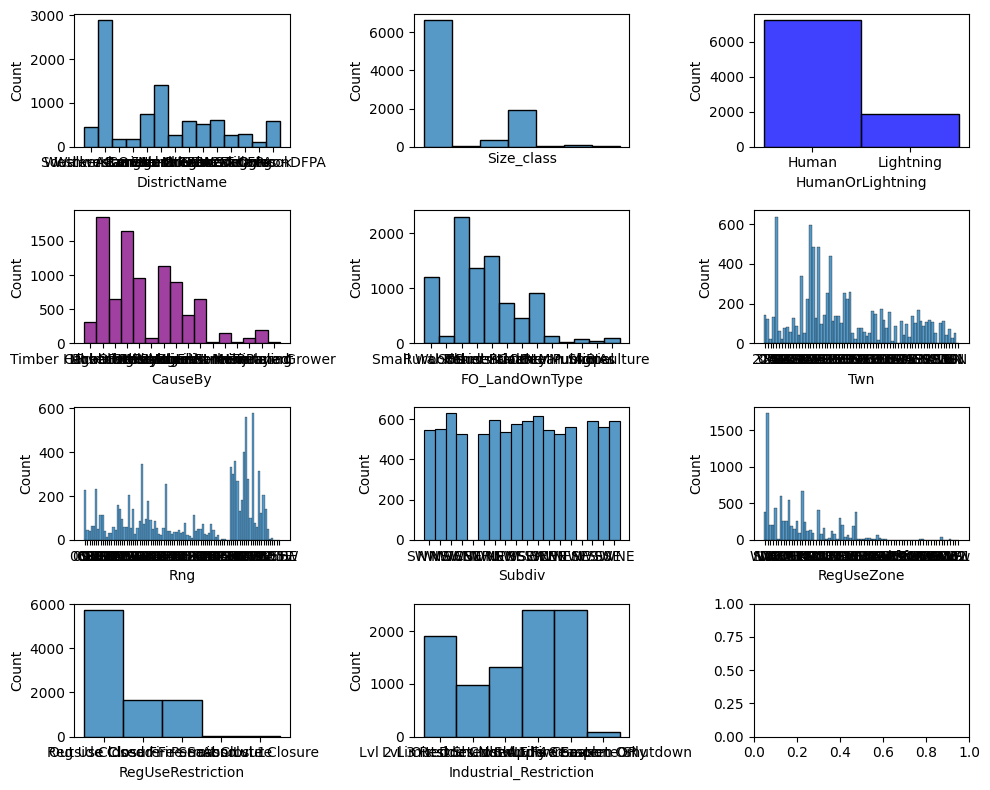

In [15]:
#Graficar variables categoricas
import matplotlib.pyplot as plt
import seaborn as sns

fig,axis = plt.subplots(4, 3, figsize=(10,8))

sns.histplot(ax=axis[0,0],data=df_categorico,x='DistrictName')             
sns.histplot(ax=axis[0,1],data=df_categorico,x='Size_class').set_xticks([])
sns.histplot(ax=axis[0,2],data=df_categorico,x='HumanOrLightning', color='blue')
sns.histplot(ax=axis[1,0],data=df_categorico,x='CauseBy', color='purple')
sns.histplot(ax=axis[1,1],data=df_categorico,x='FO_LandOwnType')
sns.histplot(ax=axis[1,2],data=df_categorico,x='Twn')
sns.histplot(ax=axis[2,0],data=df_categorico,x='Rng')
sns.histplot(ax=axis[2,1],data=df_categorico,x='Subdiv')
sns.histplot(ax=axis[2,2],data=df_categorico,x='RegUseZone')
sns.histplot(ax=axis[3,0],data=df_categorico,x='RegUseRestriction')
sns.histplot(ax=axis[3,1],data=df_categorico,x='Industrial_Restriction')

plt.tight_layout()
plt.show()

In [ ]:
#Factorizar variables categoricas
df['new_group_n']=pd.factorize(df['new_group'])[0]                    
df['Hemisphere_ew_n']=pd.factorize(df['Hemisphere_ew'])[0]
df['Hemisphere_ns_n']=pd.factorize(df['Hemisphere_ns'])[0]
df['cntry_name_n']=pd.factorize(df['cntry_name'])[0]
df['GeoLocation_n']=pd.factorize(df['GeoLocation'])[0]
df.head()

In [ ]:
#Analisis numerico
# Analisis de correlacion.
sns.heatmap(df[['mass (g)', 'reclat', 'reclong', 'new_group_n', 'Hemisphere_ew_n', 'Hemisphere_ns_n', 'cntry_name_n', 'GeoLocation_n']].corr(),annot=True,fmt='.2f')

plt.tight_layout()
plt.show()

In [ ]:
# Revision de distribucion y outlayers.
fig,axis = plt.subplots(2, 2, figsize=(10,8))

sns.boxplot(ax=axis[0,0],data=df,y='mass (g)')
sns.boxplot(ax=axis[0,1],data=df,y='Hemisphere_ns')       #Meh
sns.boxplot(ax=axis[1,0],data=df,y='Hemisphere_ew')       #Meh
sns.boxplot(ax=axis[1,1],data=df,y='GeoLocation_n') 

plt.tight_layout()
plt.show()

In [8]:
#Pasar tipos Date a float o string